# Răzvan-Gabriel Olariu - DS - 411 - Anomaly Detection - Laboratory 1

In [1]:
import numpy as np
from pyod.utils.data import generate_data
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt

Training samples:(400, 2)


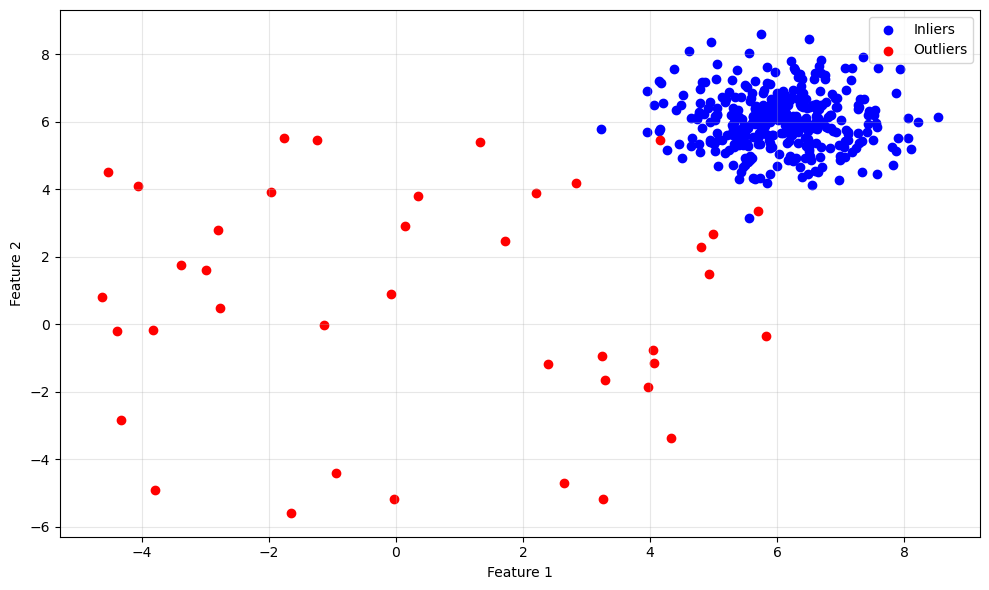

In [ ]:
# Exercise 1

# Use the generate data() function from pyod.utils.data to generate a 2- dimensional dataset with 500 normal samples (400 training samples and 100 test samples) with a contamination rate of 0.1.

X_train, X_test, y_train, y_test = generate_data(n_train=400,n_test=100,contamination=0.1, random_state=42)

#Use pyplot.scatter() function to plot the training samples, choosing a different color for the outliers

plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', label='Inliers')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [3]:
# Exercise 2

#Choose a model from pyod (ex: KNN), leave all the parameters default (ex- cept the contamination, which will match the contamination used for dataset generation) and fit it with the training data. Get the predictions of the model for both the training and the testing data.

model = KNN(contamination=0.1)
model.fit(X_train)

y_train_pred = model.labels_
y_test_pred = model.predict(X_test)

In [4]:
# print((y_train_pred))

Confusion matrix for the training data looks like 
[[358   2]
 [  2  38]]

And for the testing data it looks like 
[[90  0]
 [ 1  9]]

Training Set Metrics:
TPR: 0.9500, TNR: 0.9944, *BA*: 0.9722, FPR: 0.0056, TP: 38, FN: 2, FP: 2, TN: 358

Testing Set Metrics:
TPR: 0.9000, TNR: 1.0000, *BA*: 0.9500, FPR: 0.0000, TP: 9, FN: 1, FP: 0, TN: 90



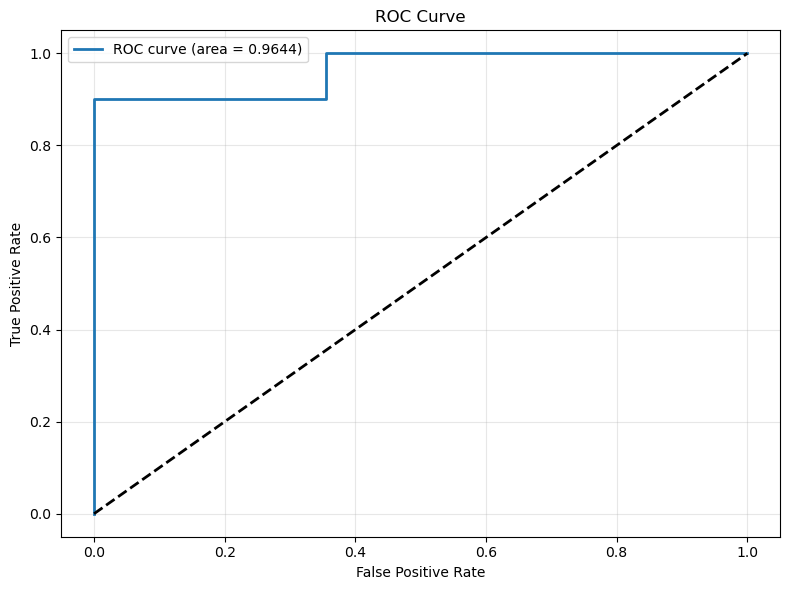

In [5]:
from sklearn.metrics import auc


y_train_scores = model.decision_scores_
y_test_scores = model.decision_function(X_test)

confusion_train = confusion_matrix(y_train, y_train_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix for the training data looks like \n{0}\n\nAnd for the testing data it looks like \n{1}\n'.format(confusion_train, confusion_test))

# Use the confusion matrix function from sklearn.metrics to find the number of TN, TP, FN and FP and compute the balanced accuracy.
cm = confusion_matrix(y_test, y_test_pred)


def calculate_metrics(cm):
    TN, FP, FN, TP = cm.flatten()

    #in case of division by zero, we set the metrics to 0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    BA = (TPR + TNR) / 2
    
    return TPR, TNR, BA, FPR, TP, FN, FP, TN

TPR_train, TNR_train, BA_train, FPR_train, TP_train, FN_train, FP_train, TN_train = calculate_metrics(confusion_train)

TPR_test, TNR_test, BA_test, FPR_test, TP_test, FN_test, FP_test, TN_test = calculate_metrics(confusion_test)

print(f"Training Set Metrics:\nTPR: {TPR_train:.4f}, TNR: {TNR_train:.4f}, *BA*: {BA_train:.4f}, FPR: {FPR_train:.4f}, TP: {TP_train}, FN: {FN_train}, FP: {FP_train}, TN: {TN_train}\n")

print(f"Testing Set Metrics:\nTPR: {TPR_test:.4f}, TNR: {TNR_test:.4f}, *BA*: {BA_test:.4f}, FPR: {FPR_test:.4f}, TP: {TP_test}, FN: {FN_test}, FP: {FP_test}, TN: {TN_test}\n")


fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Contamination Rate: 0.2
Testing Set Metrics:
TPR: 0.9000, TNR: 0.9444, *BA*: 0.9222, FPR: 0.0556, TP: 9, TN: 85, FP: 5, FN: 1



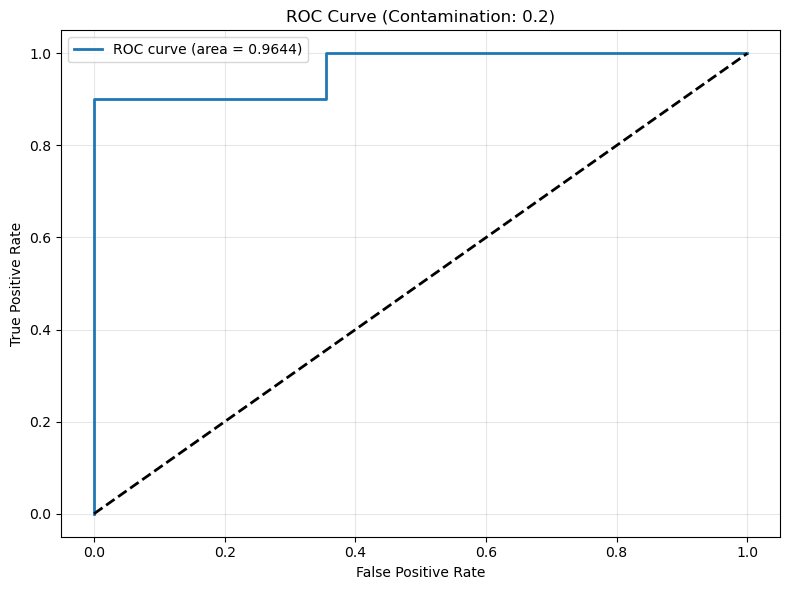

Contamination Rate: 0.3
Testing Set Metrics:
TPR: 0.9000, TNR: 0.8333, *BA*: 0.8667, FPR: 0.1667, TP: 9, TN: 75, FP: 15, FN: 1



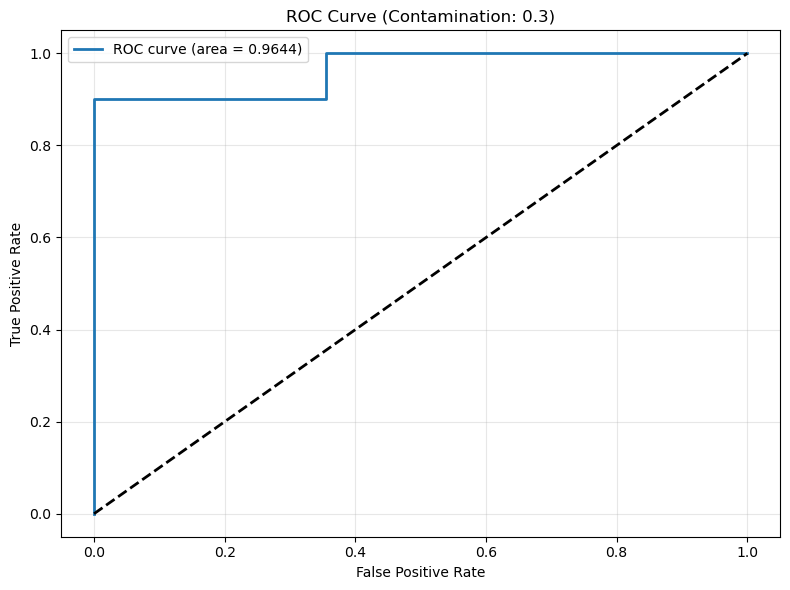

Contamination Rate: 0.4
Testing Set Metrics:
TPR: 0.9000, TNR: 0.7444, *BA*: 0.8222, FPR: 0.2556, TP: 9, TN: 67, FP: 23, FN: 1



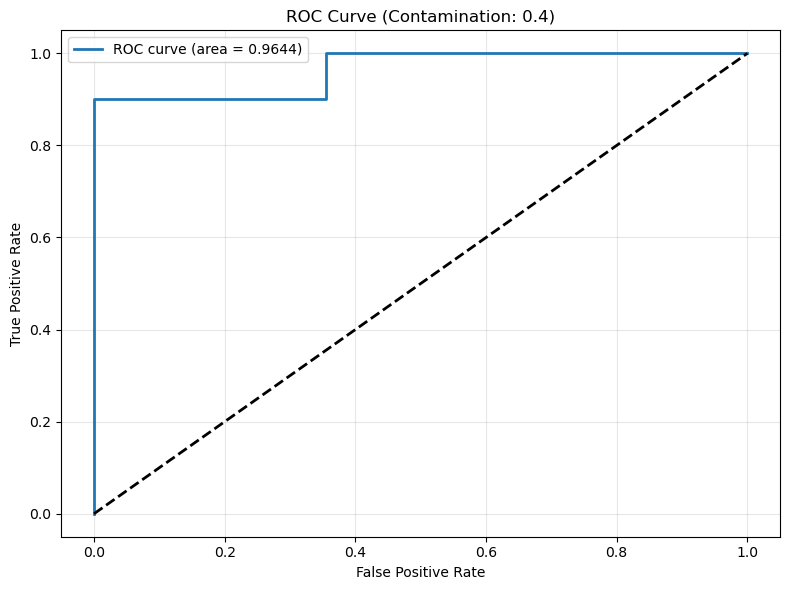

In [6]:
# Change the contamination rate used by the model and see how the reported metrics change.
X_train, X_test, y_train, y_test = generate_data(n_train=400, n_test=100, contamination=0.1, random_state=42)

for contamination in [0.2, 0.3, 0.4]:
    
    model = KNN(contamination=contamination)
    model.fit(X_train)

    y_train_pred = model.labels_
    y_test_pred = model.predict(X_test)
    y_test_scores = model.decision_function(X_test)
    confusion_test = confusion_matrix(y_test, y_test_pred)
    

    TPR_test, TNR_test, BA_test, FPR_test, TP_test, FN_test, FP_test, TN_test = calculate_metrics(confusion_test)
    print(f"Contamination Rate: {contamination}")
    print(f"Testing Set Metrics:\nTPR: {TPR_test:.4f}, TNR: {TNR_test:.4f}, *BA*: {BA_test:.4f}, FPR: {FPR_test:.4f}, TP: {TP_test}, TN: {TN_test}, FP: {FP_test}, FN: {FN_test}\n")
    fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Contamination: {contamination})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [7]:
# Exercise 3
# Generate a unidimensional dataset with 10 % contamination rate, 1000 training samples and no testing samples using generate data(). Try to detect the anomalies in the dataset by using the Z-scores. In order to do that you should compute the Z-score threshold that would classify the given percent (contamination rate) of data as anomalies (use np.quantile() function). Compute the balanced accuracy of the designed method.
X_train, y_train = generate_data(n_train=1000, n_features=1, n_test=0, contamination=0.1, train_only=True)

mean = np.mean(X_train)
std = np.std(X_train)
# Z-score formula z = (x - mu) / sigma
z_scores = np.abs((X_train - mean) / std)
print('Mean: {0:4f}\nStd. Dev:{1:4f}\nZ-scores range:[{2:4f},{3:4f}]'.format(mean,std,np.min(z_scores),np.max(z_scores)))

threshold = np.quantile(z_scores, 1 - 0.10)
y_pred = (z_scores.flatten() > threshold).astype(int)

cm = confusion_matrix(y_train, y_pred)

TPR, TNR, BA, FPR, TP, FN, FP, TN = calculate_metrics(cm)
print(f"Confusion Matrix:\n{cm}\nBA:{BA:.4f}")


Mean: 5.413701
Std. Dev:2.066606
Z-scores range:[0.025170,5.491657]
Confusion Matrix:
[[888  12]
 [ 12  88]]
BA:0.9333


In [8]:
# Exercise 4
#Same as Ex. 3 but for a multidimensional dataset. Choose your own mean vector µand covariance matrix Σ and build your dataset by hand starting with the samples generated from a multivariate standard normal distribution, x∼ N(0,I). Using the Cholesky decomposition of the covariance matrix Σ = LLT draw your samples y like this: y= Lx+ µ and then compute the Z-scores. All other tasks as in Ex. 3.

mu = np.array([15.3, -8.7, 22.1])
sigma = np.array([
    [3.8, -1.2, 0.9],
    [-1.2, 5.4, 1.7],
    [0.9, 1.7, 4.2]
])
print('Mean vector mu is {0}, and the var-covar matrix is\n{1}'.format(mu,sigma))

eigenvalues = np.linalg.eigvals(sigma)
print(f"Eigenvalues of the covariance-var matrix is {eigenvalues}")
print(f"Is the matrix positive definite?\n{all(eigenvalues > 0)}")

Mean vector mu is [15.3 -8.7 22.1], and the var-covar matrix is
[[ 3.8 -1.2  0.9]
 [-1.2  5.4  1.7]
 [ 0.9  1.7  4.2]]
Eigenvalues of the covariance-var matrix is [1.89892383 4.80801176 6.69306441]
Is the matrix positive definite?
True


In [9]:
x = np.random.randn(1000, 3)

#Cholesky decomposition
L = np.linalg.cholesky(sigma)
print(f'Cholesky decomposition:\n{L}')

# Verify if L @ LT = Sigma
print("Verification of L @ LT = Sigma is {0}".format(np.allclose(L @ L.T, sigma)))

y = x @ L.T + mu

Cholesky decomposition:
[[ 1.94935887  0.          0.        ]
 [-0.61558701  2.24077054  0.        ]
 [ 0.46169026  0.88550366  1.78961598]]
Verification of L @ LT = Sigma is True


In [10]:
# Let's add some anomalies

contamination_rate = 0.1
number_outliers = int(len(y) * contamination_rate)

outliers = np.random.randn(number_outliers, 3) * 10 + mu + 16
y_final = np.vstack([y[:-number_outliers], outliers])

y_true = np.hstack([np.zeros(len(y) - number_outliers), np.ones(number_outliers)])

shuffle = np.random.permutation(len(y_final))
y_final = y_final[shuffle]
y_true = y_true[shuffle]

print(f'Final dataset shape is {y_final.shape}, and number of outliers is {np.sum(y_true)}')

Final dataset shape is (1000, 3), and number of outliers is 100.0


In [11]:
# Calculate the mean
mean_final = np.mean(y_final, axis=0)
cov_final = np.cov(y_final.T)
cov_inv = np.linalg.inv(cov_final)

print(f'Mean of the final dataset is {mean_final}\nCovariance matrix is\n{cov_final}\nInverse covariance matrix is\n{cov_inv}')

# Calculate Mahalanobis distances
mah_dist = np.zeros(len(y_final))
for i in range(len(y_final)):
    diff = y_final[i] - mean_final
    mah_dist[i] = np.sqrt(diff.T @ cov_inv @ diff)
print(f'Mahalanobis distances range from {np.min(mah_dist):.4f} to {np.max(mah_dist):.4f}')


Mean of the final dataset is [17.06758759 -7.09483353 23.56673932]
Covariance matrix is
[[37.51359036 23.52755901 22.91342565]
 [23.52755901 35.39179826 22.00639011]
 [22.91342565 22.00639011 33.06379016]]
Inverse covariance matrix is
[[ 0.05454938 -0.02176457 -0.02331715]
 [-0.02176457  0.05688838 -0.02278042]
 [-0.02331715 -0.02278042  0.06156556]]
Mahalanobis distances range from 0.0688 to 9.2361


In [12]:
# Threshold

threshold = np.quantile(mah_dist, 1 - contamination_rate)
y_pred = (mah_dist > threshold).astype(int)

cm = confusion_matrix(y_true, y_pred)
TPR, TNR, BA, FPR, TP, FN, FP, TN = calculate_metrics(cm)

print(f"Confusion Matrix:\n{cm}\nBA:{BA:.4f}\nTPR:{TPR:.4f}\nTNR:{TNR:.4f}\nFPR:{FPR:.4f}\nTP:{TP} TN:{TN} FP:{FP} FN:{FN}")

Confusion Matrix:
[[897   3]
 [  3  97]]
BA:0.9833
TPR:0.9700
TNR:0.9967
FPR:0.0033
TP:97 TN:897 FP:3 FN:3


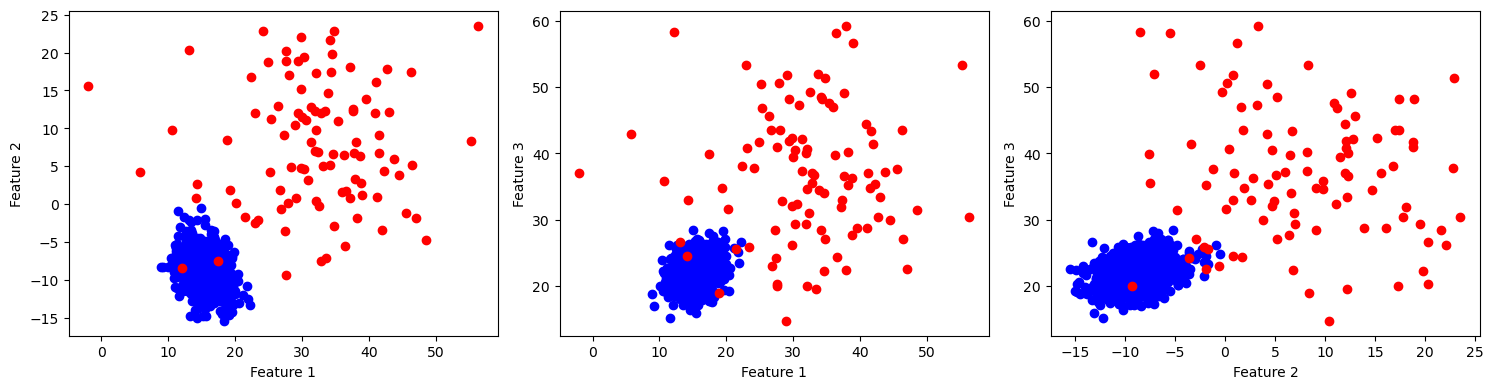

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Feature 1 vs Feature 2
axes[0].scatter(y_final[y_true==0, 0], y_final[y_true==0, 1], c='blue')
axes[0].scatter(y_final[y_true==1, 0], y_final[y_true==1, 1], c='red')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Feature 1 vs Feature 3
axes[1].scatter(y_final[y_true==0, 0], y_final[y_true==0, 2], c='blue')
axes[1].scatter(y_final[y_true==1, 0], y_final[y_true==1, 2], c='red')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 3')

# Feature 2 vs Feature 3
axes[2].scatter(y_final[y_true==0, 1], y_final[y_true==0, 2], c='blue')
axes[2].scatter(y_final[y_true==1, 1], y_final[y_true==1, 2], c='red')
axes[2].set_xlabel('Feature 2')
axes[2].set_ylabel('Feature 3')

plt.tight_layout()
plt.show()